  # Business Model Analysis

This notebook explores a company's business model based on data provided around time of customer orders, region of orders, customer order rating, and order issues. 

* **Part 1: Initial Data Processing**: Cleaning the overall dataset

    -  Packages and Data Upload
    -  Top-down overview of the dataset
    -  Cleaning NULL values
* **Part 2: Data Exploration and Additional Processing**: Understanding the variables
* **Part 3: Data Visualization**: Extracting insights by visualizing relationships between variables.  

# Part 1: Initial Data Processing

In this part, I process the information across the entirety of the dataset. I begin by understanding the dataset and its contents on a high level by implementing seaborn's heatmap capacities, and cleaning where necessary. 

**Packages and Data Upload**

In [92]:
# Numerical packages

import pandas as pd
import numpy as np

In [93]:
# Plotting packages

import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Inline call

%matplotlib inline

In [95]:
# Data Upload

df = pd.read_csv('order_data.csv')

**Understanding the dataset**

In [96]:
# Understanding the content of each column in the dataset

df.head()

,delivery_time,order_id,customer_rating,issue_reported,region
0,2014-06-02 04:23:16 UTC,233599337,5,NaN,chi
1,2014-06-02 03:57:50 UTC,233599376,5,NaN,chi
2,2014-06-02 02:52:38 UTC,233599328,5,NaN,chi
3,2014-06-02 02:52:04 UTC,233599070,5,NaN,chi
4,2014-06-02 02:41:43 UTC,233599100,5,NaN,chi


In [97]:
# Understanding the type of data in each column in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 5 columns):
delivery_time      14957 non-null object
order_id           14957 non-null int64
customer_rating    14957 non-null int64
issue_reported     1087 non-null object
region             14957 non-null object
dtypes: int64(2), object(3)
memory usage: 584.3+ KB


*Note*: This dataset has 14,957 entries. 

We should transform the order_id variable into a string, since the ID variable has no meaning as integer. 

In [98]:
# Changing column types from int to object

df['order_id'] = df['order_id'].astype('object')

In [99]:
# Checking again the type of data in each column in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 5 columns):
delivery_time      14957 non-null object
order_id           14957 non-null object
customer_rating    14957 non-null int64
issue_reported     1087 non-null object
region             14957 non-null object
dtypes: int64(1), object(4)
memory usage: 584.3+ KB


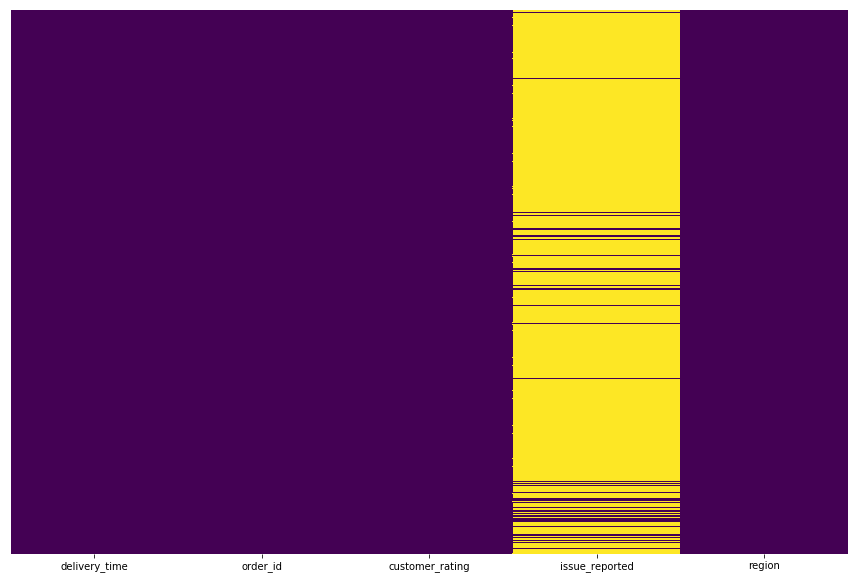

In [100]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Interpretation*: This means that, in most cases, there was no issue reported with the order. However, for easier analysis, I will convert those NaN values to 'No issues reported,' so that classification can be easier later on.  

In [101]:
# Let's replace genre NULL values with 'No issues reported' category

df['issue_reported'] = df.issue_reported.replace(np.nan, 'No issues reported', regex=True)

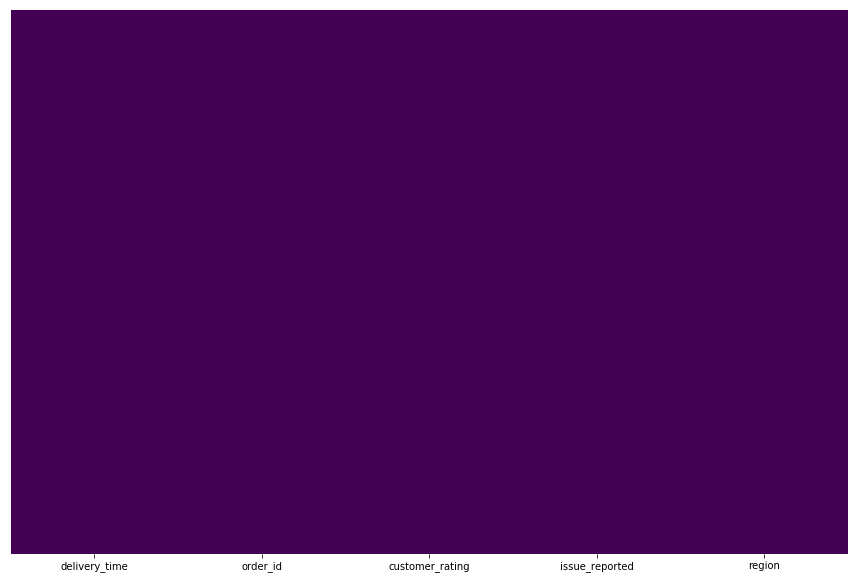

In [102]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [103]:
# Pre-Final check: did we get rid of all NULL values? If any columns are TRUE, we still have NULL values. 

pd.isnull(df).sum() > 0

delivery_time      False
order_id           False
customer_rating    False
issue_reported     False
region             False
dtype: bool

The dataset has no NULL values, so we are set for data exploration. 

## Part 2: Data Exploration and Additional Processing

Let's understand the unique values for customer rating, issues reported, and region variables. 

In [104]:
# Unique values

print(df['customer_rating'].unique())
print('')
print(df['issue_reported'].unique())
print('')
print(df['region'].unique())

[5 4 3 2 1 0]

['No issues reported' 'Wrong item' 'Item charged incorrectly'
 'Damaged or spoiled' 'Item missing' 'Other Order Issue' 'Poor service'
 'Poor replacement']

['chi' 'nyc' 'sf' 'sf ']


It seems that there is a 'sf ' string, which is an error in data import. So, we need to re-name this string to 'sf'. In general, let's rename all strings to their corresponding cities. 

In [105]:
# Renaming the region variable  

df['region'] = df['region'].map({'sf ': 'San Francisco', 'sf': 'San Francisco', 'chi': 'Chicago', 'nyc': 'NYC'})

In [106]:
# Unique values revisited 

print(df['customer_rating'].unique())
print('')
print(df['issue_reported'].unique())
print('')
print(df['region'].unique())

[5 4 3 2 1 0]

['No issues reported' 'Wrong item' 'Item charged incorrectly'
 'Damaged or spoiled' 'Item missing' 'Other Order Issue' 'Poor service'
 'Poor replacement']

['Chicago' 'NYC' 'San Francisco']


Since we have three cities in three different US time zones, the dates will have to be adjusted for each city. It makes sense to, at this point, split the dataframe into three separate dataframes. All the date times in the raw datafile are provided as UTC, so we will have to adjust based on that timezone. 

**Adjustments of timezones based on cities**

In [107]:
# New York Dataframe
df_nyc = df[df['region'] == 'NYC']

In [108]:
df_nyc.head()

,delivery_time,order_id,customer_rating,issue_reported,region
6430,2014-06-02 02:33:02 UTC,233599247,5,No issues reported,NYC
6431,2014-06-02 01:31:11 UTC,233598545,5,No issues reported,NYC
6432,2014-06-02 01:20:37 UTC,233598831,5,No issues reported,NYC
6433,2014-06-01 23:31:22 UTC,233598712,5,No issues reported,NYC
6434,2014-06-01 23:25:49 UTC,233598480,5,No issues reported,NYC


In [109]:
# Chicago Dataframe
df_chi = df[df['region'] == 'Chicago']

In [110]:
df_chi.head()

,delivery_time,order_id,customer_rating,issue_reported,region
0,2014-06-02 04:23:16 UTC,233599337,5,No issues reported,Chicago
1,2014-06-02 03:57:50 UTC,233599376,5,No issues reported,Chicago
2,2014-06-02 02:52:38 UTC,233599328,5,No issues reported,Chicago
3,2014-06-02 02:52:04 UTC,233599070,5,No issues reported,Chicago
4,2014-06-02 02:41:43 UTC,233599100,5,No issues reported,Chicago


In [111]:
# San Francisco Dataframe
df_sf = df[df['region'] == 'San Francisco']

In [112]:
df_sf.head()

,delivery_time,order_id,customer_rating,issue_reported,region
7720,2014-06-02 06:16:19 UTC,233599504,5,No issues reported,San Francisco
7721,2014-06-02 05:58:10 UTC,233599318,5,No issues reported,San Francisco
7722,2014-06-02 05:47:00 UTC,233599434,5,No issues reported,San Francisco
7723,2014-06-02 05:42:17 UTC,233599167,5,No issues reported,San Francisco
7724,2014-06-02 05:40:08 UTC,233599356,5,No issues reported,San Francisco


*New York Adjustment - 5 hours behind of UTC*

In [113]:
# Converting to timestamp
df_nyc['delivery_time'] = pd.to_datetime(df_nyc['delivery_time'])

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
df_nyc.head()

,delivery_time,order_id,customer_rating,issue_reported,region
6430,2014-06-02 02:33:02,233599247,5,No issues reported,NYC
6431,2014-06-02 01:31:11,233598545,5,No issues reported,NYC
6432,2014-06-02 01:20:37,233598831,5,No issues reported,NYC
6433,2014-06-01 23:31:22,233598712,5,No issues reported,NYC
6434,2014-06-01 23:25:49,233598480,5,No issues reported,NYC


In [115]:
# Subtracting 5 hours from UTC 

df_nyc['delivery_time'] = df_nyc['delivery_time'] - pd.Timedelta(hours = 5)

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
df_nyc.head()

,delivery_time,order_id,customer_rating,issue_reported,region
6430,2014-06-01 21:33:02,233599247,5,No issues reported,NYC
6431,2014-06-01 20:31:11,233598545,5,No issues reported,NYC
6432,2014-06-01 20:20:37,233598831,5,No issues reported,NYC
6433,2014-06-01 18:31:22,233598712,5,No issues reported,NYC
6434,2014-06-01 18:25:49,233598480,5,No issues reported,NYC


*Chicago Adjustment - 6 hours behind of UTC*

In [117]:
# Converting to timestamp
df_chi['delivery_time'] = pd.to_datetime(df_chi['delivery_time'])

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
df_chi.head()

,delivery_time,order_id,customer_rating,issue_reported,region
0,2014-06-02 04:23:16,233599337,5,No issues reported,Chicago
1,2014-06-02 03:57:50,233599376,5,No issues reported,Chicago
2,2014-06-02 02:52:38,233599328,5,No issues reported,Chicago
3,2014-06-02 02:52:04,233599070,5,No issues reported,Chicago
4,2014-06-02 02:41:43,233599100,5,No issues reported,Chicago


In [119]:
# Subtracting 6 hours from UTC 

df_chi['delivery_time'] = df_chi['delivery_time'] - pd.Timedelta(hours = 6)

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
df_chi.head()

,delivery_time,order_id,customer_rating,issue_reported,region
0,2014-06-01 22:23:16,233599337,5,No issues reported,Chicago
1,2014-06-01 21:57:50,233599376,5,No issues reported,Chicago
2,2014-06-01 20:52:38,233599328,5,No issues reported,Chicago
3,2014-06-01 20:52:04,233599070,5,No issues reported,Chicago
4,2014-06-01 20:41:43,233599100,5,No issues reported,Chicago


*San Francisco Adjustment - 8 hours behind of UTC*

In [121]:
# Converting to timestamp

df_sf['delivery_time'] = pd.to_datetime(df_sf['delivery_time'])

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
df_sf.head()

,delivery_time,order_id,customer_rating,issue_reported,region
7720,2014-06-02 06:16:19,233599504,5,No issues reported,San Francisco
7721,2014-06-02 05:58:10,233599318,5,No issues reported,San Francisco
7722,2014-06-02 05:47:00,233599434,5,No issues reported,San Francisco
7723,2014-06-02 05:42:17,233599167,5,No issues reported,San Francisco
7724,2014-06-02 05:40:08,233599356,5,No issues reported,San Francisco


In [123]:
# Subtracting 8 hours from UTC 

df_sf['delivery_time'] = df_sf['delivery_time'] - pd.Timedelta(hours = 8)

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
df_sf.head()

,delivery_time,order_id,customer_rating,issue_reported,region
7720,2014-06-01 22:16:19,233599504,5,No issues reported,San Francisco
7721,2014-06-01 21:58:10,233599318,5,No issues reported,San Francisco
7722,2014-06-01 21:47:00,233599434,5,No issues reported,San Francisco
7723,2014-06-01 21:42:17,233599167,5,No issues reported,San Francisco
7724,2014-06-01 21:40:08,233599356,5,No issues reported,San Francisco


# Part 3: Data Visualization

***Concentration of orders across the three markets***

In [125]:
# Importing division capabilities

from __future__ import division

In [126]:
# NY share

nyc_perc = round(len(df_nyc)/len(df),2)*100

In [127]:
# SF share

sf_perc = round(len(df_sf)/len(df),2)*100

In [128]:
# Chicago share

chi_perc = round(len(df_chi)/len(df),2)*100

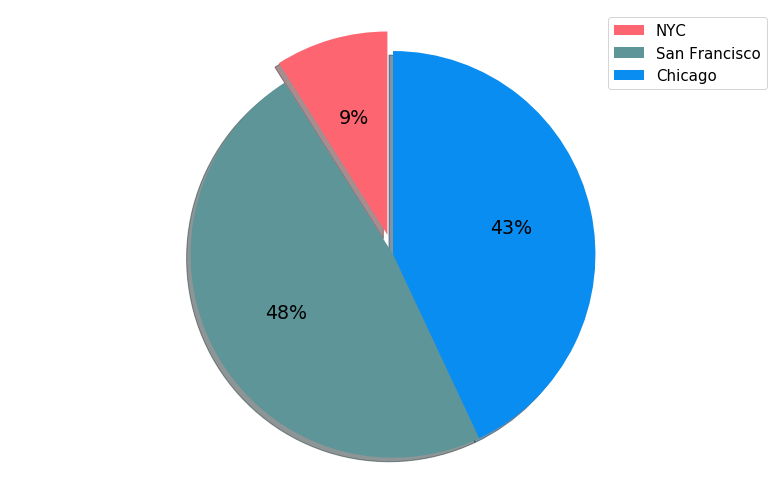

In [129]:
# Pie chart 

fig, ax = plt.subplots(figsize = (11,7))
sizes = [nyc_perc, sf_perc, chi_perc]
colors = ['#FD6571', '#5D9598', '#098df0']
labels = ['NYC', 'San Francisco', 'Chicago']
explode = [0.1, 0, 0]

plt.pie(sizes, autopct='%1.0f%%', colors=colors, shadow=True, startangle=90, explode = explode,
        textprops={'fontsize': 19})
plt.legend(labels, fontsize = 15)
plt.axis('equal')
plt.tight_layout()
plt.show()

In this dataset, San Francisco and Chicago share a fairly similar portion of the market, while NYC does not. We will now look whether there are notable differences across these three markets. 

***Distribution of Scores***

([<matplotlib.axis.YTick at 0x10a8d2e8>,
 <a list of 5 Text yticklabel objects>)

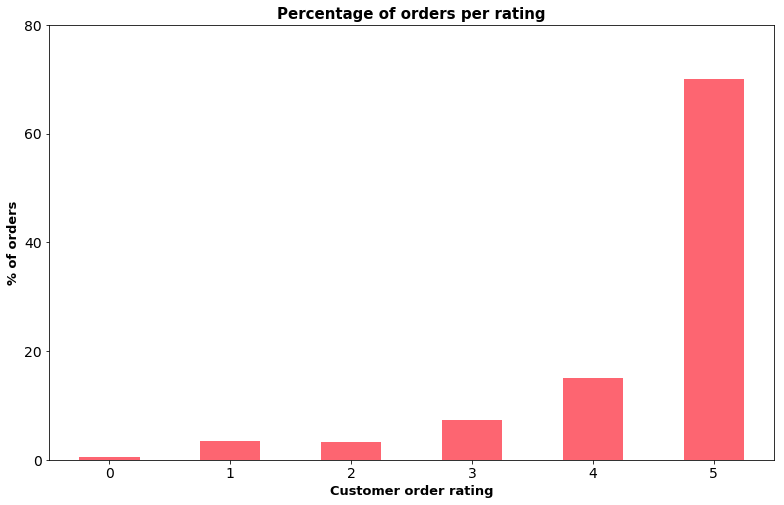

In [130]:
## DISTRIBUTION OF SCORES - NYC

# Length of NYC dataset

nyc_orders = len(df_nyc)

# We first get the frequency in terms of percentage
scores_ny = df_nyc.groupby('customer_rating')[["order_id"]].count().divide(nyc_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = scores_ny.plot.bar(figsize = (13,8), legend = False, color='#FD6571')
freq_plot.set_title("Percentage of orders per rating", weight = 'bold', size = 15)
freq_plot.set_xlabel("Customer order rating", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 20, 40, 60, 80], fontsize = 14)

([<matplotlib.axis.YTick at 0x12592160>,
 <a list of 5 Text yticklabel objects>)

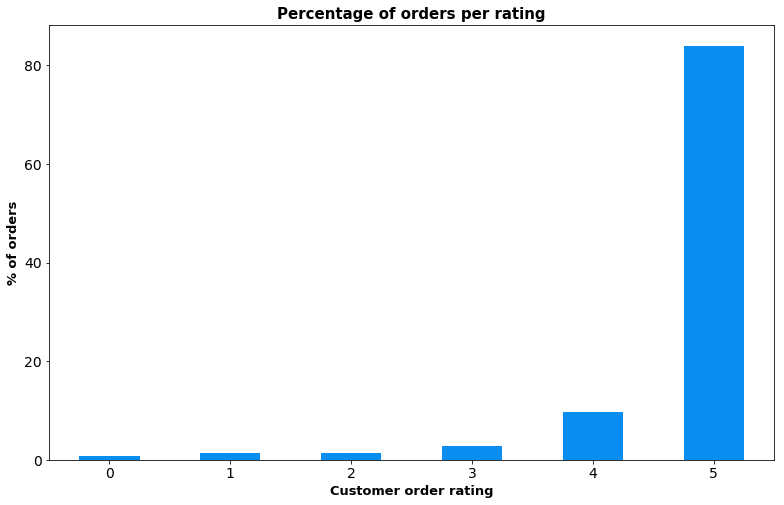

In [131]:
## DISTRIBUTION OF SCORES - Chicago

# Length of Chicago dataset

chi_orders = len(df_chi)

# We first get the frequency in terms of percentage
scores = df_chi.groupby('customer_rating')[["order_id"]].count().divide(chi_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = scores.plot.bar(figsize = (13,8), legend = False, color='#098df0')
freq_plot.set_title("Percentage of orders per rating", weight = 'bold', size = 15)
freq_plot.set_xlabel("Customer order rating", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 20, 40, 60, 80], fontsize = 14)

([<matplotlib.axis.YTick at 0x13ee5278>,
 <a list of 5 Text yticklabel objects>)

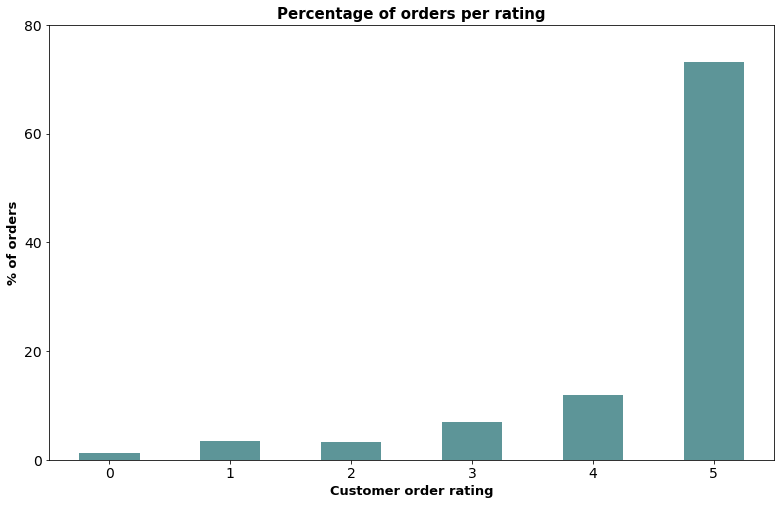

In [132]:
## DISTRIBUTION OF SCORES - San Francisco

# Length of SF dataset

sf_orders = len(df_sf)

# We first get the frequency in terms of percentage
scores = df_sf.groupby('customer_rating')[["order_id"]].count().divide(sf_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = scores.plot.bar(figsize = (13,8), legend = False, color='#5D9598')
freq_plot.set_title("Percentage of orders per rating", weight = 'bold', size = 15)
freq_plot.set_xlabel("Customer order rating", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 20, 40, 60, 80], fontsize = 14)

***Distribution of Issues/Complaints***

([<matplotlib.axis.YTick at 0x14073208>,
 <a list of 6 Text yticklabel objects>)

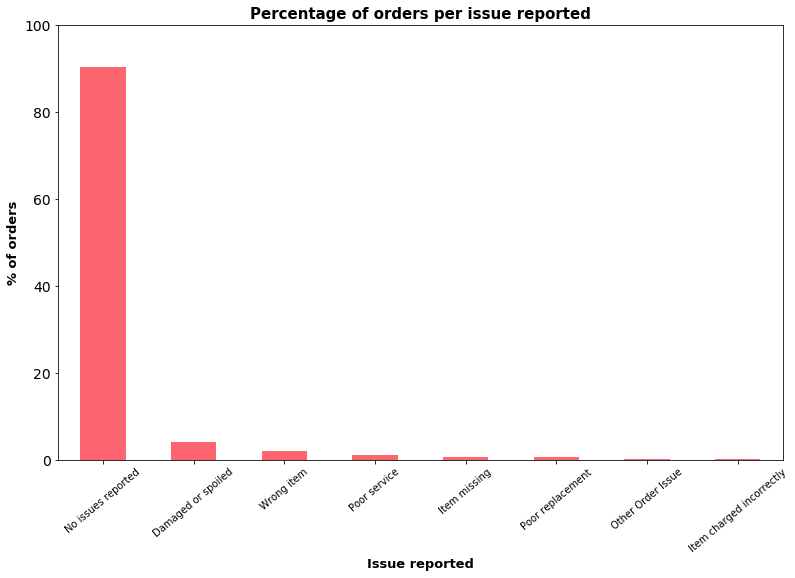

In [133]:
## DISTRIBUTION OF ISSUES - NYC

# Length of NYC dataset

nyc_orders = len(df_nyc)

# We first get the frequency in terms of percentage
issues_ny = df_nyc.groupby('issue_reported')[["order_id"]].count().divide(nyc_orders).multiply(100).round(decimals = 1).sort_values('order_id', ascending=False)

# Then we make a plot
freq_plot = issues_ny.plot.bar(figsize = (13,8), legend = False, color='#FD6571')
freq_plot.set_title("Percentage of orders per issue reported", weight = 'bold', size = 15)
freq_plot.set_xlabel("Issue reported", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 10, rotation = 40)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize = 14)

([<matplotlib.axis.YTick at 0x14223668>,
 <a list of 6 Text yticklabel objects>)

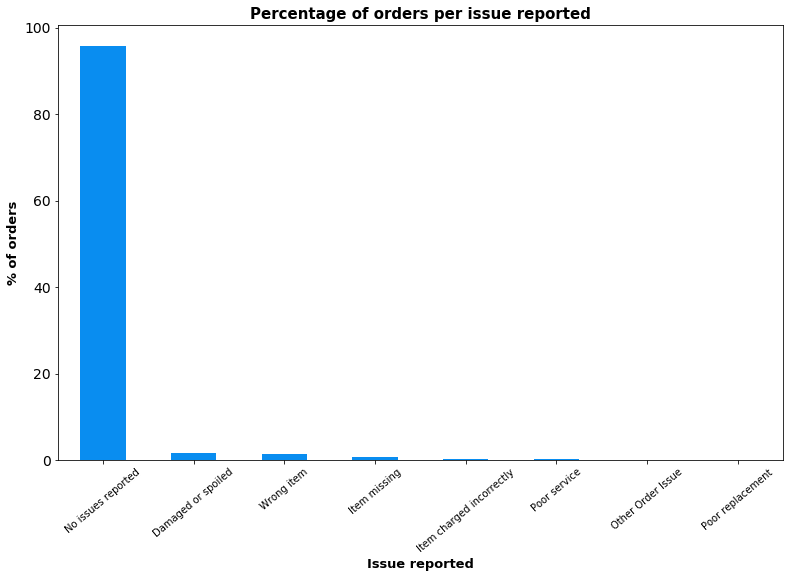

In [134]:
## DISTRIBUTION OF ISSUES - Chicago

# Length of Chicago dataset

chi_orders = len(df_chi)

# We first get the frequency in terms of percentage
issues_chi = df_chi.groupby('issue_reported')[["order_id"]].count().divide(chi_orders).multiply(100).round(decimals = 1).sort_values('order_id', ascending=False)

# Then we make a plot
freq_plot = issues_chi.plot.bar(figsize = (13,8), legend = False, color='#098df0')
freq_plot.set_title("Percentage of orders per issue reported", weight = 'bold', size = 15)
freq_plot.set_xlabel("Issue reported", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 10, rotation = 40)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize = 14)

([<matplotlib.axis.YTick at 0x1432edd8>,
 <a list of 6 Text yticklabel objects>)

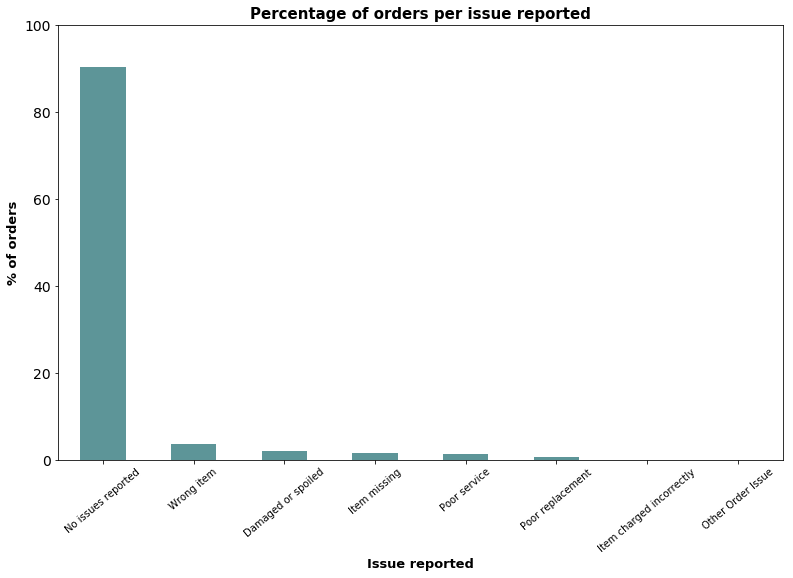

In [135]:
## DISTRIBUTION OF ISSUES - San Francisco

# Length of San Francisco dataset

sf_orders = len(df_sf)

# We first get the frequency in terms of percentage
issues_sf = df_sf.groupby('issue_reported')[["order_id"]].count().divide(sf_orders).multiply(100).round(decimals = 1).sort_values('order_id', ascending=False)

# Then we make a plot
freq_plot = issues_sf.plot.bar(figsize = (13,8), legend = False, color='#5D9598')
freq_plot.set_title("Percentage of orders per issue reported", weight = 'bold', size = 15)
freq_plot.set_xlabel("Issue reported", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 10, rotation = 40)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize = 14)

***Distribution of orders across hours of day***

*Some of the hours are omitted for the three cities (for example, outlier early hours), as they do not add to any knowledge or insight into trends.*

In [136]:
# New York

df_nyc['time_hour'] = df_nyc.delivery_time.apply(lambda x: x.hour)

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

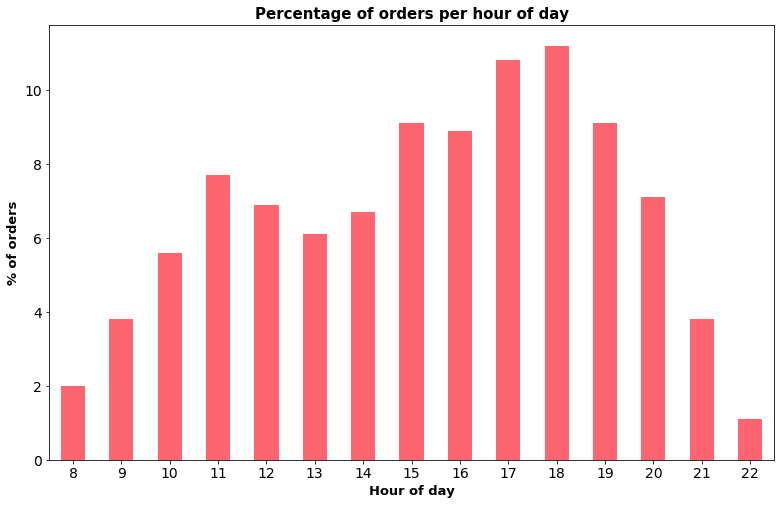

In [137]:
# Distribution of orders across hours - New York 

nyc_orders = len(df_nyc)

# We first get the frequency in terms of percentage
hours_ny = df_nyc.groupby('time_hour')[["order_id"]].count().divide(nyc_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = hours_ny[hours_ny.index >= 8].plot.bar(figsize = (13,8), legend = False, color='#FD6571')
freq_plot.set_title("Percentage of orders per hour of day", weight = 'bold', size = 15)
freq_plot.set_xlabel("Hour of day", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks(fontsize = 14)

In [138]:
# Chicago

df_chi['time_hour'] = df_chi.delivery_time.apply(lambda x: x.hour)

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

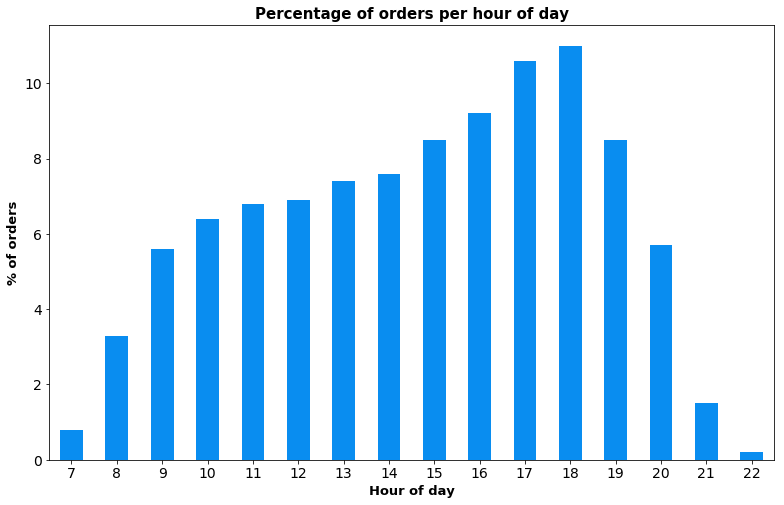

In [139]:
# Distribution of orders across hours - Chicago

chi_orders = len(df_chi)

# We first get the frequency in terms of percentage
hours_chi = df_chi.groupby('time_hour')[["order_id"]].count().divide(chi_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = hours_chi[hours_chi.index < 23].plot.bar(figsize = (13,8), legend = False, color='#098df0')
freq_plot.set_title("Percentage of orders per hour of day", weight = 'bold', size = 15)
freq_plot.set_xlabel("Hour of day", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks(fontsize = 14)

In [140]:
# San Francisco 

df_sf['time_hour'] = df_sf.delivery_time.apply(lambda x: x.hour)

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.YTick at 0x14837be0>,
 <a list of 6 Text yticklabel objects>)

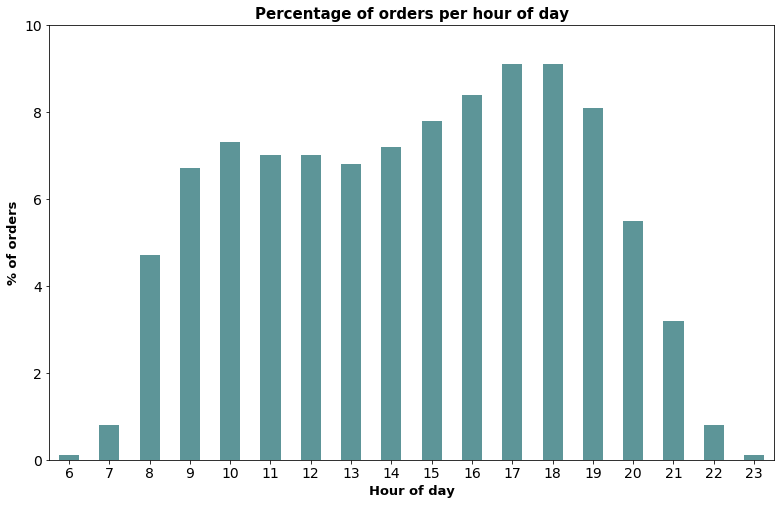

In [141]:
# Distribution of orders across hours - San Francisco

sf_orders = len(df_sf)

# We first get the frequency in terms of percentage
hours_sf = df_sf.groupby('time_hour')[["order_id"]].count().divide(sf_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = hours_sf[hours_sf.index > 5].plot.bar(figsize = (13,8), legend = False, color='#5D9598')
freq_plot.set_title("Percentage of orders per hour of day", weight = 'bold', size = 15)
freq_plot.set_xlabel("Hour of day", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 2, 4, 6, 8, 10], fontsize = 14)

***Distribution of orders across days of the week***

In [142]:
# New York

df_nyc['time_weekday'] = df_nyc.delivery_time.apply(lambda x: x.weekday())

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.YTick at 0x14a60160>,
 <a list of 5 Text yticklabel objects>)

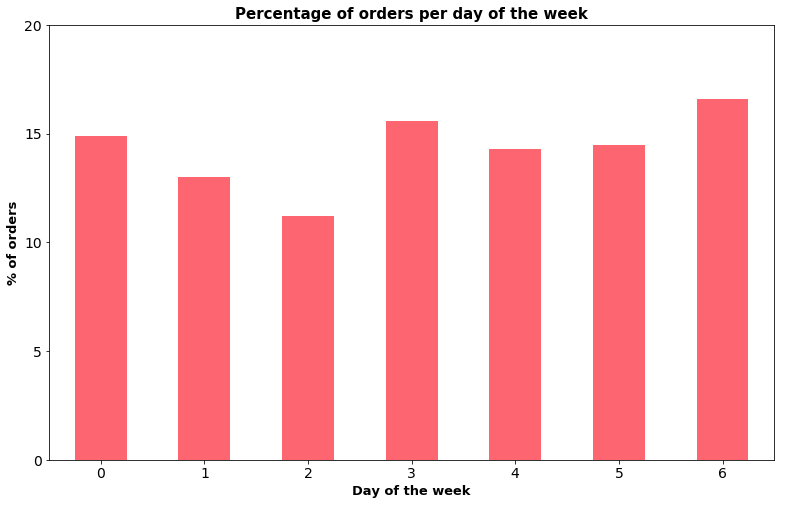

In [143]:
# Distribution of orders across days - New York 

nyc_orders = len(df_nyc)

# We first get the frequency in terms of percentage
weekdays_ny = df_nyc.groupby('time_weekday')[["order_id"]].count().divide(nyc_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = weekdays_ny.plot.bar(figsize = (13,8), legend = False, color='#FD6571')
freq_plot.set_title("Percentage of orders per day of the week", weight = 'bold', size = 15)
freq_plot.set_xlabel("Day of the week", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 5, 10, 15, 20], fontsize = 14)

In [144]:
# Chicago

df_chi['time_weekday'] = df_chi.delivery_time.apply(lambda x: x.weekday())

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.YTick at 0x14bfca58>,
 <a list of 5 Text yticklabel objects>)

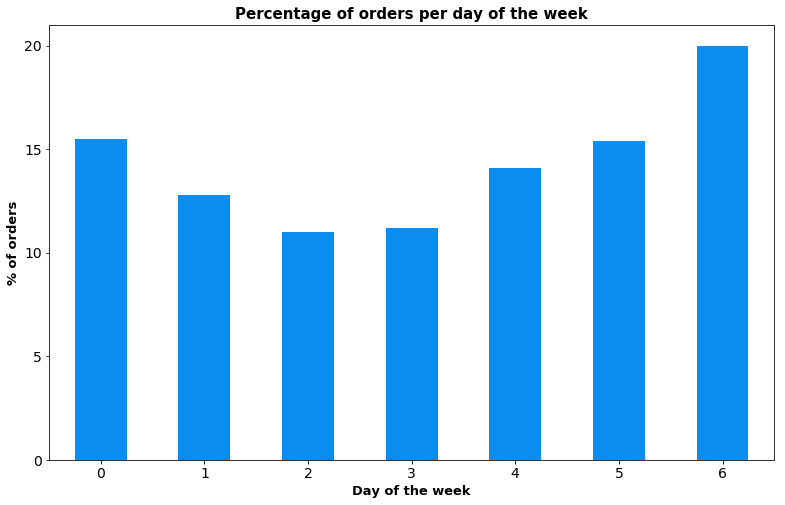

In [145]:
# Distribution of orders across days - Chicago 

chi_orders = len(df_chi)

# We first get the frequency in terms of percentage
weekdays_chi = df_chi.groupby('time_weekday')[["order_id"]].count().divide(chi_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = weekdays_chi.plot.bar(figsize = (13,8), legend = False, color='#098df0')
freq_plot.set_title("Percentage of orders per day of the week", weight = 'bold', size = 15)
freq_plot.set_xlabel("Day of the week", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 5, 10, 15, 20], fontsize = 14)

In [146]:
# San Francisco 

df_sf['time_weekday'] = df_sf.delivery_time.apply(lambda x: x.weekday())

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.YTick at 0x14db5358>,
 <a list of 5 Text yticklabel objects>)

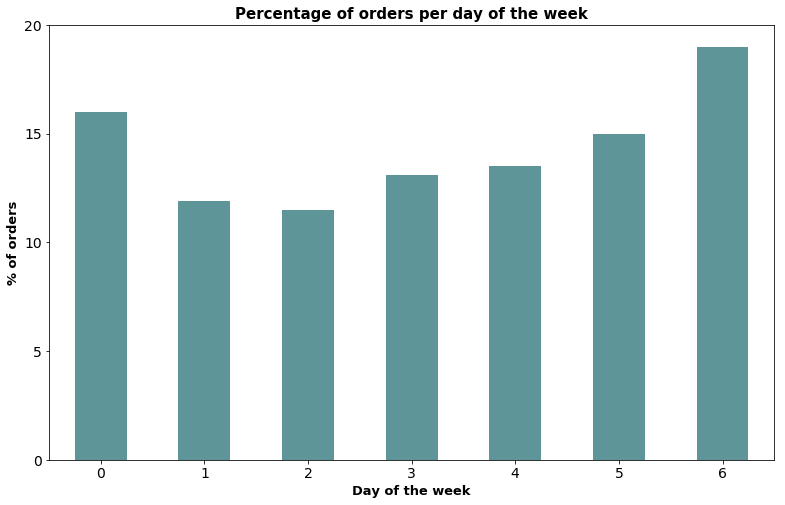

In [147]:
# Distribution of orders across days - San Francisco

sf_orders = len(df_sf)

# We first get the frequency in terms of percentage
weekdays_sf = df_sf.groupby('time_weekday')[["order_id"]].count().divide(sf_orders).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = weekdays_sf.plot.bar(figsize = (13,8), legend = False, color='#5D9598')
freq_plot.set_title("Percentage of orders per day of the week", weight = 'bold', size = 15)
freq_plot.set_xlabel("Day of the week", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of orders", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 5, 10, 15, 20], fontsize = 14)

***Daily Fluctuations in Orders Across the Three Markets***

In [148]:
# Getting NYC daily order values 

daily_nyc = df_nyc.groupby(df_nyc.delivery_time.dt.date).order_id.count()

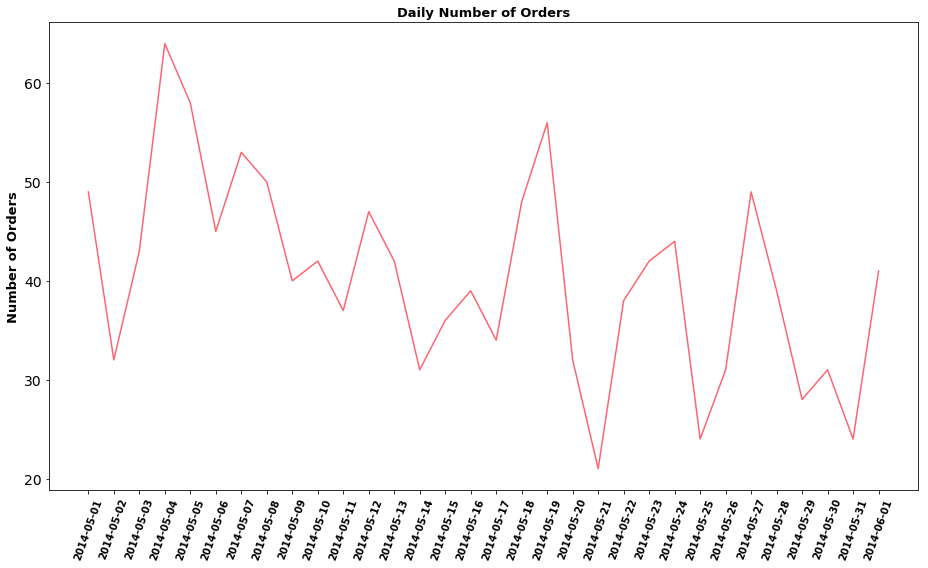

In [149]:
# Plotting the change of orders over time - NYC

daily_nyc.plot(figsize=(13,8), color = '#FD6571')
plt.xticks(daily_nyc.keys(), rotation=70, weight = 'bold')
plt.yticks(fontsize = 14)
plt.title('Daily Number of Orders', weight='bold', size = 13)
plt.xlabel('', weight='bold', size=13)
plt.ylabel('Number of Orders', weight='bold', size=13)
plt.tight_layout()

In [150]:
# Getting Chicago daily order values 

daily_chi = df_chi.groupby(df_chi.delivery_time.dt.date).order_id.count()

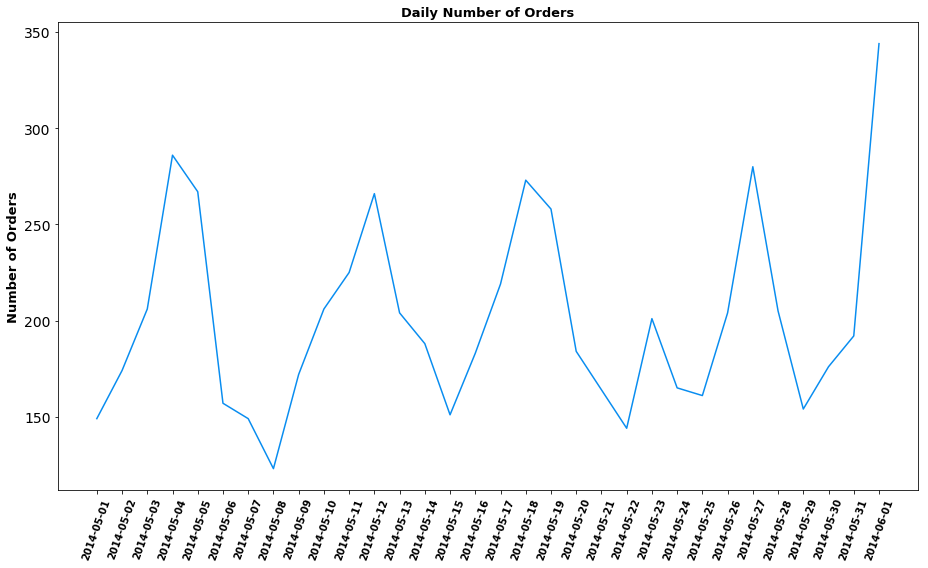

In [151]:
# Plotting the change of orders over time - Chicago

daily_chi.plot(figsize=(13,8), color = '#098df0')
plt.xticks(daily_chi.keys(), rotation=70, weight = 'bold')
plt.yticks(fontsize = 14)
plt.title('Daily Number of Orders', weight='bold', size = 13)
plt.xlabel('', weight='bold', size=13)
plt.ylabel('Number of Orders', weight='bold', size=13)
plt.tight_layout()

In [152]:
# Getting San Francisco daily order values 

daily_sf = df_sf.groupby(df_sf.delivery_time.dt.date).order_id.count()

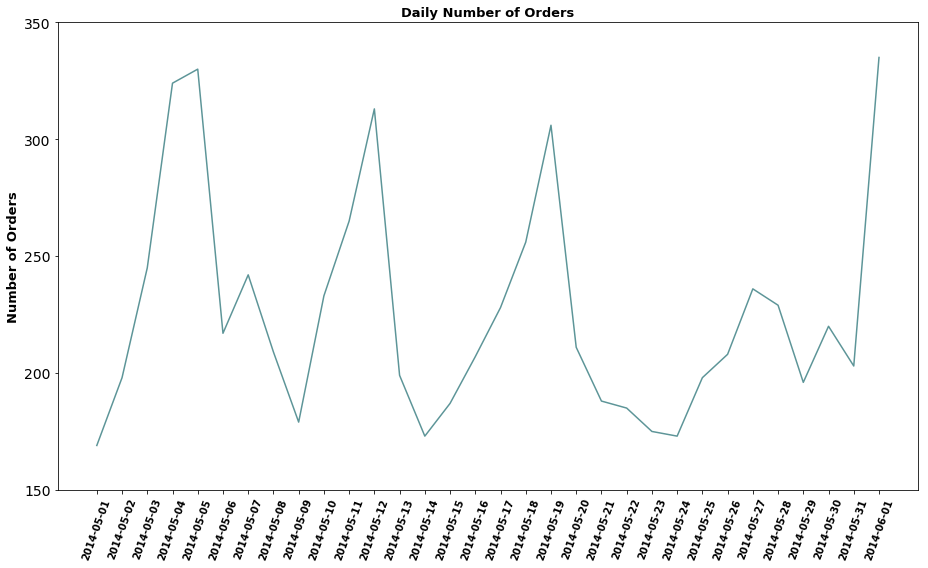

In [153]:
# Plotting the change of orders over time - San Francisco

daily_sf.plot(figsize=(13,8), color = '#5D9598')
plt.xticks(daily_sf.keys(), rotation=70, weight = 'bold')
plt.yticks([150, 200, 250, 300, 350], fontsize = 14)
plt.title('Daily Number of Orders', weight='bold', size = 13)
plt.xlabel('', weight='bold', size=13)
plt.ylabel('Number of Orders', weight='bold', size=13)
plt.tight_layout()

***Distribution of issues across hours and days***

Let's now look at distribution of issues by converting it into a binary variable: whether the issue is present or not. This will give us insights as to whether issues arise generally at any particular time of day or week. 

In [154]:
# Adjusting for New York

df_ny_issues = df_nyc
df_ny_issues.update(df_ny_issues['issue_reported'].apply(lambda x: 'No' if x == 'No issues reported' else 'Yes'))

C:\Users\Denis Bozic\Anaconda2\lib\site-packages\pandas\core\frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


In [155]:
# Adjusting for Chicago

df_chi_issues = df_chi
df_chi_issues.update(df_chi_issues['issue_reported'].apply(lambda x: 'No' if x == 'No issues reported' else 'Yes'))

In [156]:
# Adjusting for San Francisco

df_sf_issues = df_sf
df_sf_issues.update(df_sf_issues['issue_reported'].apply(lambda x: 'No' if x == 'No issues reported' else 'Yes'))

In [157]:
# Extracting only issues present for New York

ny_problems = df_ny_issues[df_ny_issues['issue_reported'] == 'Yes']

In [158]:
# Extracting only issues present for Chicago

chi_problems = df_chi_issues[df_chi_issues['issue_reported'] == 'Yes']

In [159]:
# Extracting only issues present for San Francisco

sf_problems = df_sf_issues[df_sf_issues['issue_reported'] == 'Yes']

([<matplotlib.axis.YTick at 0x167e13c8>,
 <a list of 5 Text yticklabel objects>)

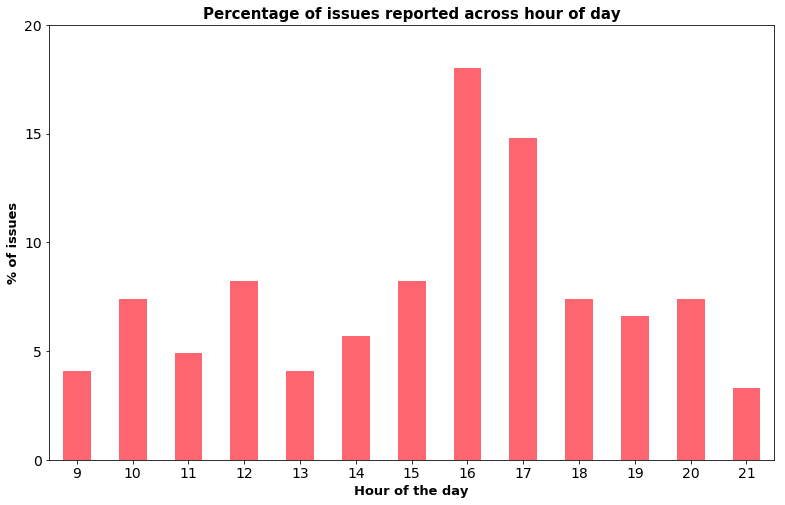

In [160]:
# Distribution of orders across hours - New York 

ny_problems_len = len(ny_problems)

# We first get the frequency in terms of percentage
problems_ny_freq = ny_problems.groupby('time_hour')[["issue_reported"]].count().divide(ny_problems_len).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = problems_ny_freq.plot.bar(figsize = (13,8), legend = False, color='#FD6571')
freq_plot.set_title("Percentage of issues reported across hour of day", weight = 'bold', size = 15)
freq_plot.set_xlabel("Hour of the day", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of issues", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 5, 10, 15, 20], fontsize = 14)

In [161]:
ny_problems_len

122

([<matplotlib.axis.YTick at 0x16599fd0>,
 <a list of 5 Text yticklabel objects>)

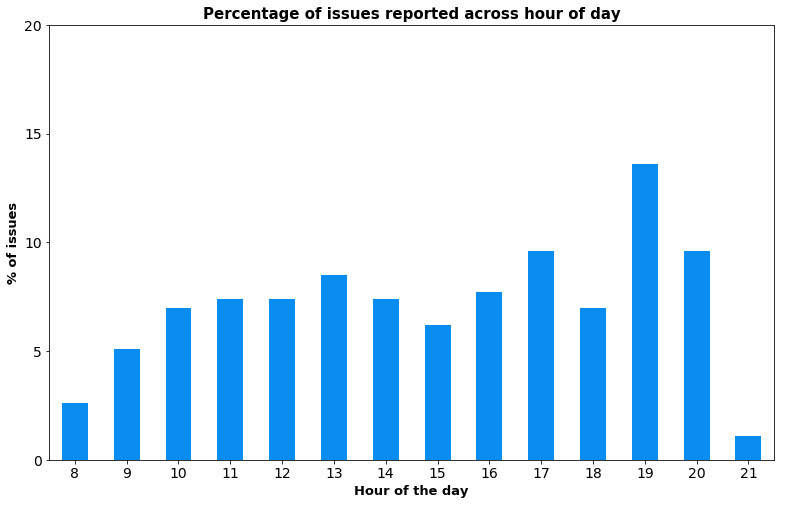

In [162]:
# Distribution of orders across hours - Chicago 

chi_problems_len = len(chi_problems)

# We first get the frequency in terms of percentage
problems_chi_freq = chi_problems.groupby('time_hour')[["issue_reported"]].count().divide(chi_problems_len).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = problems_chi_freq.plot.bar(figsize = (13,8), legend = False, color='#098df0')
freq_plot.set_title("Percentage of issues reported across hour of day", weight = 'bold', size = 15)
freq_plot.set_xlabel("Hour of the day", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of issues", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 5, 10, 15, 20], fontsize = 14)

In [163]:
chi_problems_len

272

([<matplotlib.axis.YTick at 0x1629c2e8>,
 <a list of 5 Text yticklabel objects>)

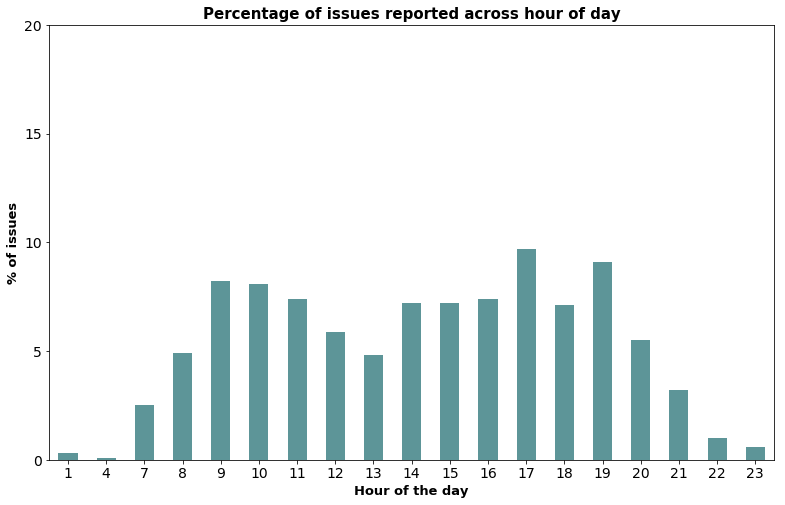

In [164]:
# Distribution of orders across hours - San Francisco

sf_problems_len = len(sf_problems)

# We first get the frequency in terms of percentage
problems_sf_freq = sf_problems.groupby('time_hour')[["issue_reported"]].count().divide(sf_problems_len).multiply(100).round(decimals = 1)

# Then we make a plot
freq_plot = problems_sf_freq.plot.bar(figsize = (13,8), legend = False, color='#5D9598')
freq_plot.set_title("Percentage of issues reported across hour of day", weight = 'bold', size = 15)
freq_plot.set_xlabel("Hour of the day", weight = 'bold', size = 13)
freq_plot.set_ylabel("% of issues", weight = 'bold', size = 13)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks([0, 5, 10, 15, 20], fontsize = 14)

In [165]:
sf_problems_len

693

In [166]:
# Preparing data for a new pie chart

all_issues = ny_problems_len + sf_problems_len + chi_problems_len 

In [167]:
# Percentage of New York issues

nyc_issues_perc = round(ny_problems_len/all_issues, 2)*100

In [168]:
# Percentage of Chicago issues

chi_issues_perc = round(chi_problems_len/all_issues, 2)*100

In [169]:
# Percentage of San Francisco Issues

sf_issues_perc = round(sf_problems_len/all_issues, 2)*100

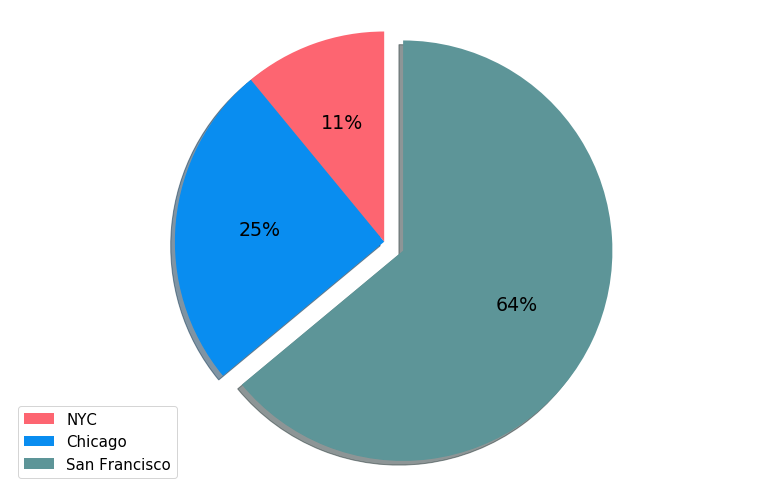

In [170]:
# Pie chart for issues distribution across the three markets 

fig, ax = plt.subplots(figsize = (11,7))
sizes = [nyc_issues_perc, chi_issues_perc, sf_issues_perc]
colors = ['#FD6571', '#098df0', '#5D9598']
labels = ['NYC', 'Chicago', 'San Francisco']
explode = [0, 0, 0.1]

plt.pie(sizes, autopct='%1.0f%%', colors=colors, shadow=True, startangle=90, explode = explode,
        textprops={'fontsize': 19})
plt.legend(labels, fontsize = 15)
plt.axis('equal')
plt.tight_layout()
plt.show()